### Unsupervised learning approaches

This notebooks demonstrates a few unsupervised learning approaches using the diabetes dataset in sklearn.

Although the diabetes dataset is a regresion problem, we will use it to explore a few unpservised learning algorithms:
- K-means clustering
- Hierarchical clustering
- T-SNE
- PCA

Clustering is the task of partitioning the data into groups, called _clusters_. The GOAL is to split the data in such a way that points within a cluster(group) are very similar. 

#### Data import 

In [28]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The native to sklearn datasets are raw and dictionary-like. 

In [17]:
raw_data = load_diabetes()
raw_data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

Transform them to a normal pandas DataFrame.

In [22]:
data = pd.DataFrame( np.c_[raw_data['data'], raw_data['target']],
                     columns= raw_data['feature_names'] + ['target'])

In [23]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [34]:
data.shape

(442, 11)

In [87]:
# Suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.4f' % x)
data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000
mean,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,152.1335
std,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,77.0930
min,-0.1072,-0.0446,-0.0903,-0.1124,-0.1268,-0.1156,-0.1023,-0.0764,-0.1261,-0.1378,25.0000
25%,-0.0373,-0.0446,-0.0342,-0.0367,-0.0342,-0.0304,-0.0351,-0.0395,-0.0332,-0.0332,87.0000
50%,0.0054,-0.0446,-0.0073,-0.0057,-0.0043,-0.0038,-0.0066,-0.0026,-0.0019,-0.0011,140.5000
75%,0.0381,0.0507,0.0312,0.0356,0.0284,0.0298,0.0293,0.0343,0.0324,0.0279,211.5000
max,0.1107,0.0507,0.1706,0.1320,0.1539,0.1988,0.1812,0.1852,0.1336,0.1356,346.0000


We see that the features have been scaled/normalized (could be very important with K-means, PCA and other techniques).

## K-means clustering 

**K-means** is one of the simplest and commonly used clustering algorithms. It tried to find _cluster centers_ that are representative of certain regions of the data. In a nutshell, the algorithm works in the following way: 

- You specify the number of clusters within the data, and the algorithm selects data points at random as the respective clusters (if we select 3 clusters, 3 random points will be the initial cluster centers).
- Then, teratively: each data point is assigned to the cluster center closest to it (distance is measured by Euclidean, Manhattan, etc.).
- Then cluster centers are updated (recomputed) to be the mean of the assigned points. 
- After the update, some points might change the cluster to which they are assigned. 
- The process is repeated until the cluster centers no longer change.

#### Using artificial data

Let's firt demonstrate K-means with artificially created data, using the make_blobs package, which create 2-dimensional dataset.

We can tell the *make_blobs* function how many centers to create, how many samples, etc.

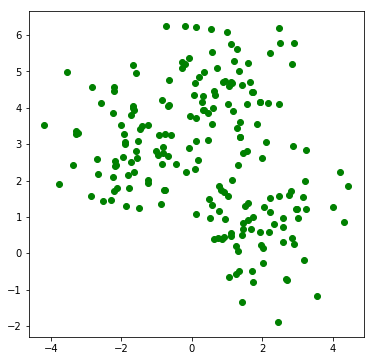

In [69]:
from sklearn.datasets.samples_generator import make_blobs

X_blob, y = make_blobs(n_samples=200, centers=3,random_state=0)

plt.figure(figsize=(6, 6))
plt.scatter(X_blob[:, 0], X_blob[:, 1], color='green')

Q: Can you distinguish the different centers? 

Let's apply K-means to it.

In [74]:
from sklearn.cluster import KMeans

kmeans_blob = KMeans(n_clusters=3)
kmeans_blob.fit(X_blob)
y_kmeans = kmeans_blob.predict(X_blob)

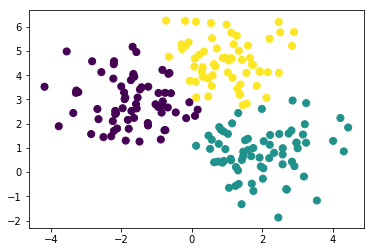

In [76]:
# Let's plot the degenrated dataset again, coloring by the predicted clusters.
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_kmeans, s=50)

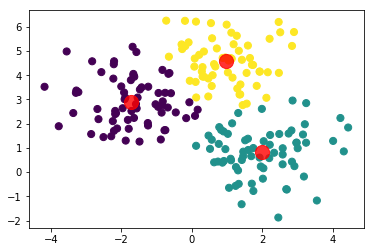

In [79]:
# We can also add the cluster centers to the plot
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_kmeans, s=50)

centers = kmeans_blob.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.8)

The K-means algorithm seems to work very well in this artificial case. It assign the points to the way we visually might assign them.

- However, in reality, we do NOT know how many clusters might be appropriate.
- It's difficult to perform clustering with high-dimenional data. 

In [24]:
from sklearn.cluster import KMeans

Provide number of clusters _n_clusters_ and fit it to the data. Default value of number of clusters is 8. 

In [81]:
y = data.target
X = data.drop('target', axis=1)

# Fit a simple KMeans algorithm 
kmeans = KMeans(n_clusters=3, random_state=1).fit(X)

#To inspect the centroid values generated by the algorithm 
centroids = kmeans.cluster_centers_
print(centroids)

[[ 1.71143731e-02  1.31764773e-02  2.52272865e-02  2.12891365e-02
   5.22510979e-02  4.99885677e-02 -2.48115925e-02  5.16251636e-02
   4.37832815e-02  3.20252061e-02]
 [-2.70390375e-02 -2.68798188e-02 -3.28366152e-02 -3.30567580e-02
  -2.36354833e-02 -2.71826634e-02  3.51255160e-02 -3.91977155e-02
  -3.75252487e-02 -3.16675430e-02]
 [ 1.42473680e-02  1.71076766e-02  1.38928685e-02  1.71375056e-02
  -1.61592524e-02 -1.08314242e-02 -1.65295207e-02  7.90078212e-05
   4.40254526e-03  7.49307718e-03]]


In [58]:
print('Size of the centroids: ', centroids.shape)
print('Size of the data set: ', X.shape)

Size of the centroids:  (3, 10)
Size of the data set:  (442, 10)


The first array contains values for the centroids of the first centroid, the second array- of the second and so on. If we had more clsuters, we'd have large first dimension of the centroids array. Basically, in pseudo-code: centroids.shape[0] == n_clusters.

Each training point is assigned a label, which you can inspect. 

In [51]:
print('Cluster membership: \n{}'.format(kmeans.labels_))

Cluster membership: 
[2 1 2 2 1 1 1 0 2 2 1 2 1 2 1 0 2 0 1 1 1 1 1 0 1 2 1 1 1 2 1 1 2 1 1 1 2
 1 0 2 0 1 2 1 2 2 1 1 2 2 2 2 1 2 1 1 2 1 1 0 1 2 1 1 2 0 2 2 2 1 1 0 0 0
 2 2 2 1 1 1 0 2 1 1 1 2 1 1 1 1 1 0 2 1 1 1 2 0 2 2 0 2 1 0 1 2 1 2 2 0 1
 1 1 0 0 0 0 0 0 1 1 2 0 0 1 2 1 1 1 0 2 1 2 1 1 2 1 2 2 2 2 0 0 1 0 2 0 0
 2 2 2 1 0 2 2 0 1 0 1 2 1 0 1 2 1 1 1 0 0 0 1 1 0 1 2 1 2 0 1 0 2 1 0 2 2
 2 0 1 0 1 2 2 2 0 1 0 1 2 1 2 1 1 0 0 2 2 0 2 0 2 1 2 2 1 1 2 0 0 1 1 1 1
 2 1 1 2 1 2 1 1 0 2 0 1 2 2 0 1 2 0 2 2 1 2 1 1 1 1 0 0 2 0 0 0 0 1 2 1 0
 2 1 1 0 1 2 2 1 0 0 1 2 2 1 0 2 2 0 1 2 2 2 1 0 1 2 0 1 0 2 0 0 0 1 2 2 2
 1 1 1 2 2 2 0 0 0 2 2 0 1 0 2 0 1 0 2 1 2 0 2 2 0 0 0 0 0 0 2 2 2 2 0 2 0
 2 1 1 0 2 1 0 2 2 2 2 0 0 0 2 1 2 0 1 1 0 0 2 1 2 1 0 2 1 2 2 2 2 0 0 0 2
 1 0 2 1 1 2 0 0 2 1 2 1 2 2 0 2 1 1 2 1 0 1 2 1 0 1 1 2 2 2 2 1 0 2 2 2 1
 2 0 0 0 1 2 1 0 0 2 1 0 1 2 0 0 0 2 1 0 2 0 1 1 2 0 1 1 1 1 2 0 2 2 1]


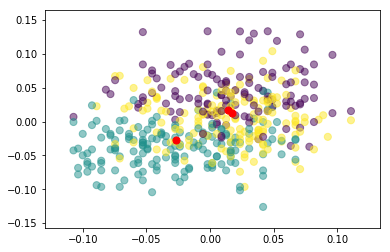

In [84]:
plt.scatter(data['age'], data['s5'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

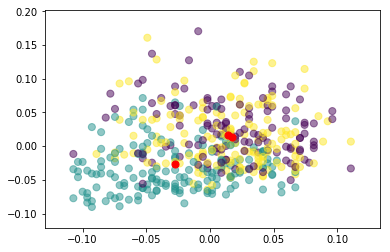

In [85]:
plt.scatter(data['age'], data['bmi'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

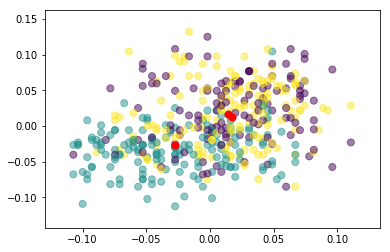

In [42]:
plt.scatter(data['age'], data['bp'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

#### Find out optimal number of clusters 

For that we can keep track of the interia value of the k-means clusters. The lower the intertia, the better. However, interia will always be lower with higher number of clusters. We want to keep the intertia down while also keeping the number of clusters realtively low, i.e. we look for the 'elbow' in the plot of number of clusters (x-axis) and the intertia value(y-axis) below. 

In [90]:
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

Text(0,0.5,'Inertia value')

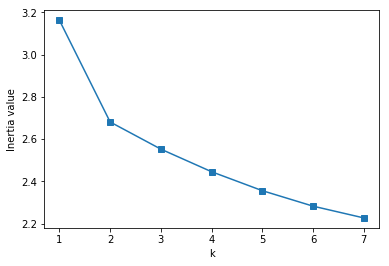

In [91]:
plt.plot(range(1, 8), inertia, marker='s')
plt.xlabel('k')
plt.ylabel('Inertia value')

### Hierarchical clustering 

It's a bottom-down approach: each sample is in a cluster of its own. We iteratively start merging the clusters closest to each other. In the end, all the samples are in a single cluster.

In [93]:
from scipy.cluster.hierarchy import linkage, dendrogram

To perform the clustering, we call the linkage function. Check the options for the methods. 

In [99]:
# To make the visualization readable and for the purposes of this example only, let's work with 50 samples from the data
mergings = linkage(X.loc[:50,:], method='complete')

The height in a dendrogram specifies max distance. Distance is measured using a linkage method. For instance, method == 'complete' means distance between clusters is the max distance between the samples in the clusters. 

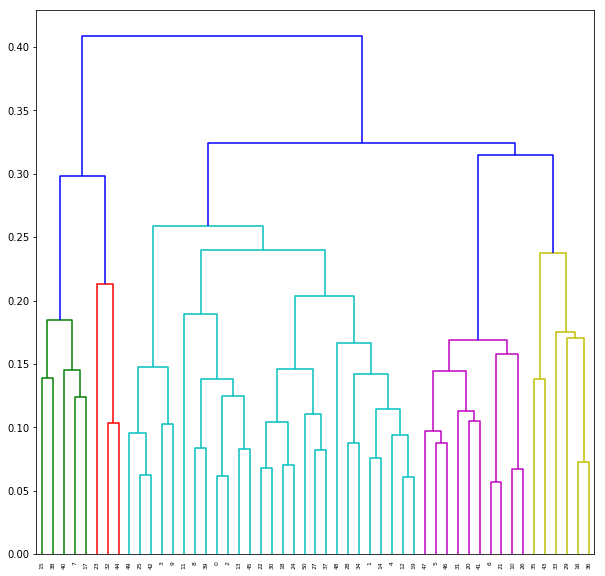

In [101]:
plt.figure(figsize=(10, 10))
dendrogram(mergings, leaf_font_size=6, leaf_rotation=90)
plt.show()

In our case, we did not have an index, but if we did, we could use the index for names in the samples in a dendrogram.

## Dimensionality reduction methods 

### Visualization: T-SNE 

Most data we will work with is high dimensional. The beauty of t-sne is that it can transform it to 2-D or 3-D. 
The mapping preserves the nearness of samples. 

This approach is mainly used as enhancing our understanding of the data. It is a manifold technique (it computes a new representation of the training data but will NOT allow transformation of new data). This means that if you have built a TSNE model on your training data, then you cannot apply the same model to the test data. 

In [109]:
from sklearn.manifold import TSNE

model= TSNE()
# Apply the tsne results in creating a 2-D array with length = length of our data set and 2 columns. 
transformed = model.fit_transform(X)

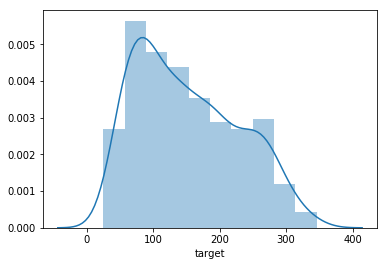

In [125]:
import seaborn as sns
y.describe()
sns.distplot(y)

# Will put y in 3 buckets
y_recoded = np.where(y< 150, 1, np.where(y<250, 2, 3))

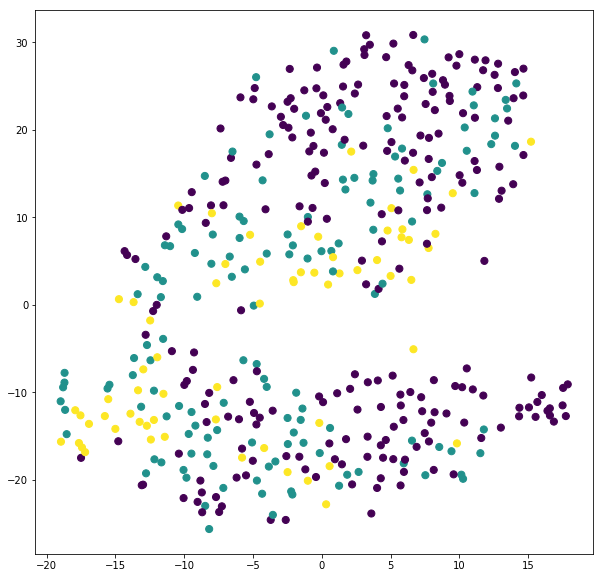

In [127]:
# Let's plot the TSNE model
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

# We will color by the recoded target (put into 3 buckets)
plt.figure(figsize=(10, 10))
plt.scatter(x_axis, y_axis, s=50, c=y_recoded)
plt.show()

It looks like there are no clear clusters/groups in the data. Perhaps we can re-train the TSNE model by specifying the learning rate.

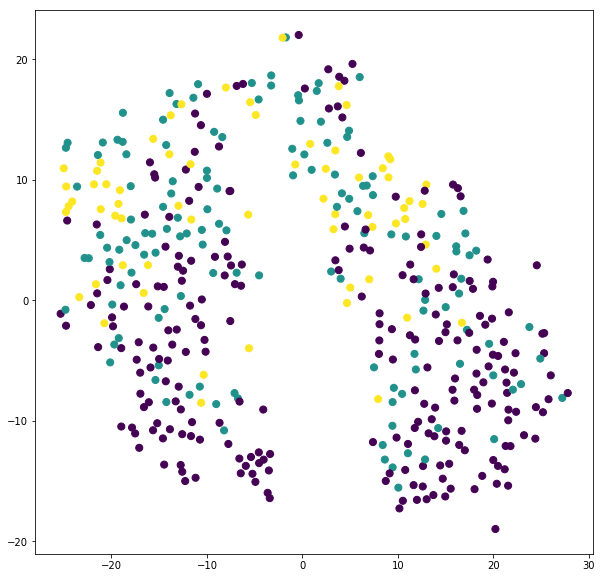

In [129]:
model= TSNE(learning_rate=200)
# Apply the tsne results in creating a 2-D array with length = length of our data set and 2 columns. 
transformed = model.fit_transform(X)

# Let's plot the TSNE model
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

# We will color by the recoded target (put into 3 buckets)
plt.figure(figsize=(10, 10))
plt.scatter(x_axis, y_axis, s=50, c=y_recoded)
plt.show()

It looks a bit better when we specified a learning rate but still not distinctive clusters. The axes here cannot really be interpreted. And like with many unspervised learning methods, the graph may look different if the method is applied again. 

### Principal component analysis (PCA) 

The most popular dimensionality reduction technique. It finds the hyperplane that is closes to the data. Then it projects the data into it. 

THE MAIN GOAL: to project the data to lower dimentions while preserving the maximum variance as this will result in less loss of information. In the first step, PCA rotates the data in such a way that the rotated features are statistically uncorrelated. 
The principal components are actually the directions in which the samples vary the most (i.e. 'direction of the variance'). 

We perform dimensionality reduction by only selecting some of the components to keep. 

In [130]:
from sklearn.decomposition import PCA

In [132]:
pca = PCA().fit(X)
transf = pca.transform(X)
print('Original shape: {}'.format(X.shape))
print('Shape of PCA array: {}'.format(transf.shape))

Original shape: (442, 10)
Shape of PCA array: (442, 10)


We see that the new PCA-transformed array has the same number of columns and rows as the original data. The columns of the transformed array are what are called 'PCA features'. 

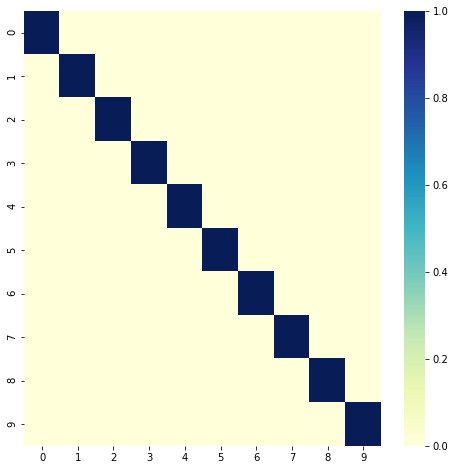

In [139]:
# Let's plot the transformed array to see there is really no correlation between the features.
plt.figure(figsize=(8, 8))
sns.heatmap(pd.DataFrame(transf).corr(), cmap="YlGnBu")

In [140]:
# We can also inspect the components:
print(pca.components_)

[[ 0.21643101  0.18696711  0.3031625   0.2717397   0.34325493  0.35186062
  -0.28243639  0.42883325  0.37861731  0.32218282]
 [ 0.04437151 -0.38654811 -0.15628061 -0.13825564  0.57302669  0.45593985
   0.50624287 -0.06818423 -0.0261893  -0.0849466 ]
 [ 0.49466811 -0.10685833  0.1675317   0.51356804 -0.0685867  -0.26969438
   0.38602787 -0.38068121  0.0636315   0.27684271]
 [-0.4140095  -0.67986052  0.49982533 -0.01966734 -0.06839533 -0.16777384
  -0.07602005  0.0079212   0.26442742  0.08708624]
 [-0.68686389  0.37345612  0.12935936  0.48689014  0.12917415  0.11673143
   0.24499115 -0.14364377 -0.1516611   0.03138792]
 [-0.2258505   0.04173103 -0.4031419  -0.27276274  0.00540864 -0.1332572
   0.1063716  -0.0339454   0.17873005  0.80506447]
 [-0.10953821 -0.06760551 -0.51985787  0.32064908  0.07364908 -0.23054011
  -0.00753445  0.07123619  0.64731345 -0.35727279]
 [ 0.01493468  0.44293966  0.39294187 -0.47736435  0.12941351 -0.19131121
   0.32463641 -0.18058834  0.44966002 -0.1666087 ]
 

To find out how many components to use, we will keep track of the variance explained with the increase of a number of features. 

Text(0,0.5,'variance')

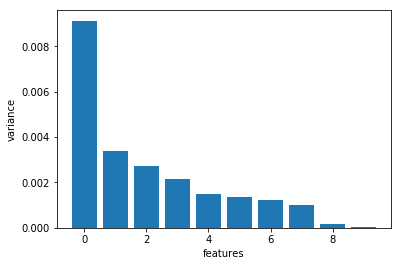

In [143]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('features')
plt.ylabel('variance')

In [145]:
# You can use the explained_variance_ratio_ argument to see what proportion of the variance much each pincipal component captures

pca.explained_variance_ratio_

array([0.40242142, 0.14923182, 0.12059623, 0.09554764, 0.06621856,
       0.06027192, 0.05365605, 0.04336832, 0.00783199, 0.00085605])

Ideally, you'd like to capture a large enough proportion of the variance, say 95%. 

In [148]:
# calculate cumulative sum of explained variance ratio
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum>0.95)

# Now we can specify the components to be equal to d.

In [152]:
# An altenative is to directly give the number of explained variance ratio we want as an argument in the pca

pca_95 = PCA(n_components=0.95).fit(X)
X_pca_95 = pca_95.transform(X)
print('How many components does the 95% explained variance retain:  {}'.format(X_pca_95.shape[1]))

How many components does the 95% explained variance retain:  8
